In [45]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib
import matplotlib.pyplot as plt
import math

In [63]:
# Example taken from https://en.wikipedia.org/wiki/Chi-squared_test#Pearson's_chi-squared_test
#
#              A   B   C    D 
M = np.array([
              [90, 60, 104, 95],  # white collar
              [30, 50, 51,  20],  # blue collar
              [30, 40, 45,  35]]) # no collar

M2 = np.array([
              [30, 15, 120, 300],  # white collar
              [50, 25, 200, 500],  # blue collar
              [30, 15, 120, 300]]) # no collar

In [65]:
chisq, pvalue, degrees, expected = chi2_contingency(M)
chisq, degrees, pvalue, expected

(245.71202858582603,
 6,
 3.3817651048308667e-50,
 array([[ 805.38461538,  805.38461538, 1073.84615385,  805.38461538],
        [ 348.46153846,  348.46153846,  464.61538462,  348.46153846],
        [ 346.15384615,  346.15384615,  461.53846154,  346.15384615]]))

In [48]:
total = np.sum(M)

A_total = np.sum(M[:, 0:1])
B_total = np.sum(M[:, 1:2])
C_total = np.sum(M[:, 2:3])
D_total = np.sum(M[:, 3:4])

white_collar_total = np.sum(M[0:1, :])
blue_collar_total = np.sum(M[1:2, :])
no_collar_total = np.sum(M[2:3, :])

print(f"total={total}")
print(f"white_collar_total={white_collar_total}")
print(f"blue_collar_total={blue_collar_total}")
print(f"no_collar_total={no_collar_total}")

print(f"A_total={A_total}")
print(f"B_total={B_total}")
print(f"C_total={C_total}")
print(f"D_total={D_total}")

total=650
white_collar_total=349
blue_collar_total=151
no_collar_total=150
A_total=150
B_total=150
C_total=200
D_total=150


In [49]:
M_expected_if_independent = np.array([
    white_collar_total/total * np.array([A_total, B_total, C_total, D_total]),
    blue_collar_total/total  * np.array([A_total, B_total, C_total, D_total]),
    no_collar_total/total    * np.array([A_total, B_total, C_total, D_total]),
])
print(np.array([A_total, B_total, C_total, D_total]))
print(no_collar_total * np.array([A_total, B_total, C_total, D_total]))

[150 150 200 150]
[22500 22500 30000 22500]


In [50]:
print(M_expected_if_independent)

[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


In [51]:
chi_quantities = (M - M_expected_if_independent)**2 / M_expected_if_independent
print(chi_quantities)

[[1.11152744e+00 5.23760194e+00 1.06678422e-01 2.59672324e+00]
 [6.73968416e-01 6.59008321e+00 4.43326541e-01 6.32518254e+00]
 [6.15384615e-01 8.37606838e-01 2.88461538e-02 4.27350427e-03]]


In [52]:
np.sum(chi_quantities)

24.571202858582595

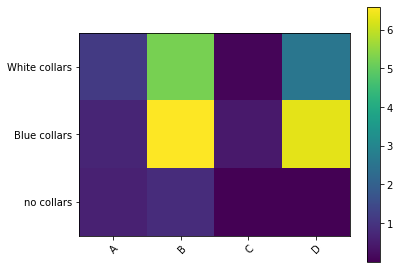

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(chi_quantities)

Y_LABELS = ["White collars", "Blue collars", "no collars"]
X_LABELS = ["A", "B", "C", "D"]

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, cmap="YlGn")
#cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(X_LABELS)))
ax.set_yticks(np.arange(len(Y_LABELS)))
ax.set_xticklabels(X_LABELS)
ax.set_yticklabels(Y_LABELS)

fig.tight_layout()
plt.show()

In [66]:
import random

def bad_dice_throw():
    probabilities = {
        1: 1/6,
        2: 1.10/6,
        3: 0.90/6,
        4: 1/6,
        5: 1/6,
        6: 1/6,
    }
    
    result = None
    while result is None:
        for k,v in random.sample(probabilities.items(), k=6):
            p = random.random()
            if random.random() <= v:
                result = k
                break
    return result

def good_dice_throw():
    return random.randint(1,6)

dice_throw = good_dice_throw
#dice_throw = bad_dice_throw

dice_face_throws = {}
for i in range(0, 100):
    throw = dice_throw()
    if throw not in dice_face_throws:
        dice_face_throws[throw] = 0
    dice_face_throws[throw] += 1

print(dice_face_throws)

{5: 15, 3: 22, 6: 19, 1: 19, 2: 10, 4: 15}


In [67]:
M = np.array([
    [dice_face_throws[1]],
    [dice_face_throws[2]],
    [dice_face_throws[3]],
    [dice_face_throws[4]],
    [dice_face_throws[5]],
    [dice_face_throws[6]],
])

M_expected = np.array([
    [np.sum(M) / 6],
    [np.sum(M) / 6],
    [np.sum(M) / 6],
    [np.sum(M) / 6],
    [np.sum(M) / 6],
    [np.sum(M) / 6],
])

print(M)
print(M_expected)

chi_matrix = (M - M_expected)**2 / M_expected

print(chi_matrix)
print(np.sum(chi_matrix))

chisq = np.sum(chi_matrix)
DOF = 5
pval = 1.0 - chi2.cdf(chisq, DOF)

print(f"This dice is fair with a probability of {pval * 100}%")

[[19]
 [10]
 [22]
 [15]
 [15]
 [19]]
[[16.66666667]
 [16.66666667]
 [16.66666667]
 [16.66666667]
 [16.66666667]
 [16.66666667]]
[[0.32666667]
 [2.66666667]
 [1.70666667]
 [0.16666667]
 [0.16666667]
 [0.32666667]]
5.359999999999999
This dice is fair with a probability of 37.35416494952158%
